In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats("svg")
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

In [10]:
df=pd.read_excel("./Data Scientist - Recruitment task - Raw data.xlsx",
                         sheet_name="Raw Data")
df.Day=pd.to_datetime(df.Day)
foot_print=df.copy()
# foot_print.index=foot_print.Day
# foot_print.drop(columns=['Day'],
#                 axis=1,
#                 inplace=True)
foot_print.head()

,Day,Advertising_Spend,Number_of_Visitors,Average_Session_Duration,Page_Load_Time,Day_of_Week,Impressions
0,2021-10-01,28008.521469,19925,3.54,4.91,Friday,140811
1,2021-10-02,20812.773757,33385,1.40,3.00,Saturday,82038
2,2021-10-03,22878.770076,38600,1.33,1.35,Sunday,36693
3,2021-10-04,11876.136172,19424,3.48,3.12,Monday,76526
4,2021-10-05,33387.536319,21196,3.48,1.42,Tuesday,124470


In [11]:
foot_print.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Day                       1045 non-null   datetime64[ns]
 1   Advertising_Spend         1045 non-null   float64       
 2   Number_of_Visitors        1045 non-null   int64         
 3   Average_Session_Duration  1045 non-null   float64       
 4   Page_Load_Time            1045 non-null   float64       
 5   Day_of_Week               1045 non-null   object        
 6   Impressions               1045 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 57.3+ KB


In [12]:
foot_print.shape

(1045, 7)

In [13]:
foot_print.isna().sum()

Day                         0
Advertising_Spend           0
Number_of_Visitors          0
Average_Session_Duration    0
Page_Load_Time              0
Day_of_Week                 0
Impressions                 0
dtype: int64

## Feature engineering

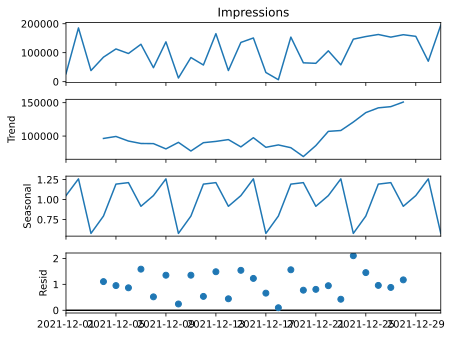

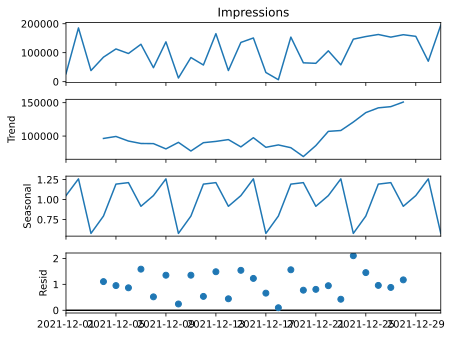

In [14]:
foot_print_fe=foot_print.copy().drop(columns=['Day_of_Week'],
                                         axis=1)
foot_print_fe.index=foot_print_fe.Day
seasonal_decompose(foot_print_fe[(foot_print_fe.Day.dt.year==2021) & (foot_print_fe.Day.dt.month>=12)].Impressions,model='multiplicative').plot()

In [16]:
foot_print_fe.drop(columns='Day',axis=1,inplace=True)
foot_print_fe